<a href="https://colab.research.google.com/github/SeoJiWon1/Study-Diary/blob/main/8%EC%9D%BC.md/2023_02_08_model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 평가 

1. 머신 러닝 모델 성능 평가
2. 머신 러닝 알고리즘 문제 분석
3. 머신 러닝 모델 튜닝
4. 성능 지표를 사용한 모델 예측 성능 평가 

In [2]:
# 최신 버전의 scikit -learn
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


## 모델 설명
악성(Malignant tumor) , 양성(Benign tumor)

종양 세포 샘플 569개

In [3]:
import pandas as pd
# csv 파일 불러오기
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## M과 B에 레이블링

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
X = df.loc[:, 2:].values

In [7]:
y = df.loc[:, 1].values

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
le.classes_

array(['B', 'M'], dtype=object)

In [10]:
le.transform(['M','B'])

array([1, 0])

## Train / Test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

## 특성 표준화, 특성 추출, 파이프라인으로 연결

In [13]:
from sklearn.preprocessing import StandardScaler      # 스케일링
from sklearn.decomposition import PCA                 # 차원 축소 
from sklearn.linear_model import LogisticRegression   # 분류 모델
from sklearn.pipeline import make_pipeline            # 파이프라인 만들기 

In [15]:
# 파이프라인 객체 만들기
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))

In [16]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [17]:
y_pred = pipe_lr.predict(X_test)

In [18]:
print("테스트 정확도 : %3f" % pipe_lr.score(X_test, y_test))

테스트 정확도 : 0.956140


In [19]:
from sklearn import set_config
set_config(display = 'diagram')
pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

## Hold - Out Cross Validation
훈련 / 테스트로 무작위 
## K-fold Cross Validation
훈련 , 검증, 테스트

## LOOCV(Leave-One-Out Cross Validation) 방법
    폴드 갯수와 훈련 샘플 갯수가 같음(k=n)
    하나의 훈련 샘플이 각 반복에서 테스트로 사용됨
    아주 작은 데이터셋 사용시

In [21]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [35]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train) # shuffle = True 

In [36]:
scores = []

In [48]:
print(X_train) 

[[1.291e+01 1.633e+01 8.253e+01 ... 8.235e-02 3.024e-01 6.949e-02]
 [1.405e+01 2.715e+01 9.138e+01 ... 1.048e-01 2.250e-01 8.321e-02]
 [1.387e+01 2.070e+01 8.977e+01 ... 6.845e-02 2.249e-01 8.492e-02]
 ...
 [1.427e+01 2.255e+01 9.377e+01 ... 1.362e-01 2.698e-01 8.351e-02]
 [1.953e+01 3.247e+01 1.280e+02 ... 1.625e-01 2.713e-01 7.568e-02]
 [1.289e+01 1.570e+01 8.408e+01 ... 1.017e-01 1.999e-01 7.127e-02]]


In [49]:
print(y_train)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 1 1 1 0]


In [37]:
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train]) # 
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1, np.bincount(y_train[train]), score))

폴드:  1, 클래스 분포: [256 153], 정확도: 0.935
폴드:  2, 클래스 분포: [256 153], 정확도: 0.935
폴드:  3, 클래스 분포: [256 153], 정확도: 0.957
폴드:  4, 클래스 분포: [256 153], 정확도: 0.957
폴드:  5, 클래스 분포: [256 153], 정확도: 0.935
폴드:  6, 클래스 분포: [257 153], 정확도: 0.956
폴드:  7, 클래스 분포: [257 153], 정확도: 0.978
폴드:  8, 클래스 분포: [257 153], 정확도: 0.933
폴드:  9, 클래스 분포: [257 153], 정확도: 0.956
폴드: 10, 클래스 분포: [257 153], 정확도: 0.956


In [85]:
print(kfold)

<generator object _BaseKFold.split at 0x7f10cd90e900>


In [84]:
print(train)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [86]:
print(test)

[409 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427
 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445
 446 447 448 449 450 451 452 453 454]


In [39]:
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도: 0.950 +/- 0.014


In [40]:
from sklearn.model_selection import cross_val_score

In [43]:
scores = cross_val_score(estimator = pipe_lr,
                         X = X_train,
                         y = y_train,
                         cv =10,
                         n_jobs =1)

In [46]:
print("CV 정확도 점수: %s" % scores)

CV 정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [47]:
print('CV 정확도 : %3f +/- %3f' % (np.mean(scores), np.std(scores)))

CV 정확도 : 0.949517 +/- 0.013854


In [50]:
from sklearn.model_selection import cross_validate

In [52]:
scores = cross_validate(estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        scoring = ['accuracy'],
                        cv = 10,
                        n_jobs = -1)

In [53]:
print('CV 정확도: %s' % scores['test_accuracy'])

CV 정확도: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [54]:
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))

CV 정확도: 0.950 +/- 0.014


In [55]:
from sklearn.model_selection import cross_val_predict

In [56]:
preds = cross_val_predict(estimator=pipe_lr,
                          X = X_train,
                          y = y_train,
                          cv=10,
                          n_jobs= -1)

In [57]:
preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [58]:
preds = cross_val_predict(estimator=pipe_lr,
                          X = X_train,
                          y = y_train,
                          cv=10,
                          method = 'predict_proba', # predict, predict_log_proba, decision_function
                          n_jobs= -1)

In [59]:
preds[:10]

array([[9.93982352e-01, 6.01764759e-03],
       [7.64328337e-01, 2.35671663e-01],
       [9.72683946e-01, 2.73160539e-02],
       [8.41658121e-01, 1.58341879e-01],
       [9.97144940e-01, 2.85506043e-03],
       [9.99803660e-01, 1.96339882e-04],
       [9.99324159e-01, 6.75840609e-04],
       [2.12145074e-06, 9.99997879e-01],
       [1.28668437e-01, 8.71331563e-01],
       [7.76260670e-04, 9.99223739e-01]])

## 학습 곡선과 검증 곡선

In [78]:
import matplotlib.pyplot as plt

In [79]:
from sklearn.model_selection import learning_curve

In [80]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))

In [81]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=-1)

In [114]:
train_scores

array([[0.89486553, 0.88508557, 0.88997555, 0.88753056, 0.89242054,
        0.88536585, 0.88536585, 0.89268293, 0.88780488, 0.8902439 ],
       [0.95110024, 0.94376528, 0.95354523, 0.94865526, 0.95599022,
        0.95121951, 0.94634146, 0.95365854, 0.94634146, 0.94878049],
       [0.98777506, 0.98533007, 0.98288509, 0.9804401 , 0.99022005,
        0.98780488, 0.98536585, 0.9804878 , 0.98536585, 0.98292683],
       [0.98777506, 0.98777506, 0.99022005, 0.99022005, 0.99022005,
        0.9902439 , 0.9902439 , 0.98780488, 0.9902439 , 0.98780488],
       [0.98533007, 0.98777506, 0.98533007, 0.99266504, 0.99266504,
        0.9902439 , 0.9902439 , 0.98780488, 0.9902439 , 0.98780488],
       [0.99022005, 0.99022005, 0.99022005, 0.99511002, 1.        ,
        0.9902439 , 0.9902439 , 0.99512195, 0.99268293, 0.98780488]])

In [82]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

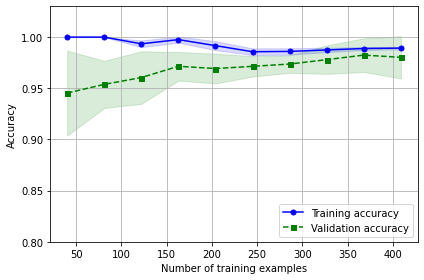

In [87]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           max_iter=10000))

train_sizes, train_scores, test_scores = \
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [88]:
# 250개 부터는 점점 완만하게 

## 검증곡선으로 과대적합과 과소적합 조사

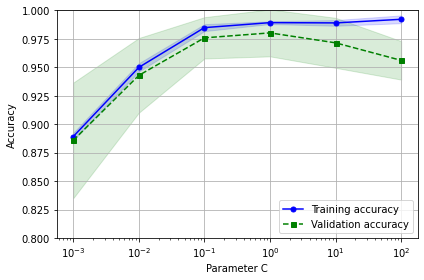

In [89]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [90]:
# parameter C값이 작을 수록 규제가 더 커진다. 
# 가장 좋은 구간 10^-1 ~ 10^0

## 그리드 서치를 사용한 머신 러넹 모델 세부 튜닝

그리드 서치를 사용한 하이퍼파라미터 튜닝

머신러닝 분야에서 하이퍼매개변수를 이런 방법으로 조정하는 작업을 그리드 서치(grid search)라고 함

### 학습되는 parameter : 가중치

### Hyperparameter: tuning parameter

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [94]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)         

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.001, random_state=1))])

In [95]:
print('테스트 정확도: %.3f' % clf.score(X_test, y_test))

테스트 정확도: 0.974


In [98]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  return_train_score=True,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
gs.cv_results_['split0_train_score']

array([0.6405868 , 0.93643032, 0.97555012, 0.98777506, 0.98533007,
       0.99266504, 0.99755501, 1.        , 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.7799511 , 0.94621027,
       0.96577017, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.78484108, 0.94621027, 0.9804401 , 0.99266504, 1.        ,
       1.        , 1.        , 1.        , 0.94621027, 0.97799511,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97799511, 0.98777506, 0.99511002, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98533007,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [99]:
# 평균값 
gs.cv_results_['mean_train_score']

array([0.6402928 , 0.93724074, 0.97240801, 0.98510406, 0.98803447,
       0.99145447, 0.99707019, 0.9992677 , 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.77070249, 0.94700817,
       0.97167094, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.77949371, 0.94725326, 0.97704753, 0.99291848, 1.        ,
       1.        , 1.        , 1.        , 0.94652096, 0.97753354,
       0.99023257, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97680064, 0.98852287, 0.99755799, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98803387,
       0.99291848, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [100]:
print('테스트 정확도: %.3f' % gs.score(X_test, y_test))

테스트 정확도: 0.974


In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

distribution = loguniform(0.0001, 1000.0)

param_dist = [{'svc__C' : distribution,
               'svc__kernel' : ['linear']},
              {'svc__C' : distribution,
               'svc__gamma': distribution,
               'svc__kernel': ['rbf']}
              ]

rs = RandomizedSearchCV(estimator = pipe_svc,
                        param_distributions = param_dist,
                        n_iter = 30,
                        random_state = 1,
                        n_jobs = -1)

rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)

0.9780219780219781
{'svc__C': 0.27606548656338126, 'svc__kernel': 'linear'}


In [106]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [107]:
hgs = HalvingGridSearchCV(estimator=pipe_svc,
                          param_grid = param_grid,
                          cv = 10,
                          n_jobs = -1,
                          verbose=1)

hgs = hgs.fit(X_train, y_train)
print(hgs.best_score_)
print(hgs.best_params_)


n_iterations: 3
n_required_iterations: 4
n_possible_iterations: 3
min_resources_: 40
max_resources_: 455
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 40
Fitting 10 folds for each of 72 candidates, totalling 720 fits
----------
iter: 1
n_candidates: 24
n_resources: 120
Fitting 10 folds for each of 24 candidates, totalling 240 fits
----------
iter: 2
n_candidates: 8
n_resources: 360
Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.9774603174603176
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [108]:
print(np.sum(hgs.cv_results_['mean_fit_time']))

0.5099865674972535


In [110]:
print('차원 리스트 :',hgs.n_resources_)
print('후보 리스트 :',hgs.n_candidates_)

차원 리스트 : [40, 120, 360]
후보 리스트 : [72, 24, 8]


In [111]:
gs =GridSearchCV(estimator = pipe_svc,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                 cv = 2) # fold 개수

scores = cross_val_score(gs, X_train, y_train, scoring = 'accuracy', cv = 5)

print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도: 0.974 +/- 0.015


In [112]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid = [{'max_depth': [1,2,3,4,5,6,7,None]}],
                  scoring = 'accuracy',
                  cv = 2)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도: 0.934 +/- 0.016
